In [1]:
# Import necessary libraries 

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split


In [2]:
# import fast.ai libraries for nlp

from fastai import *
from fastai.text import *


import fastai.utils.collect_env

fastai.utils.collect_env.show_install()



```text
=== Software === 
python        : 3.7.6
fastai        : 1.0.60
fastprogress  : 0.2.2
torch         : 1.4.0
nvidia driver : 445.75
torch cuda    : 10.1 / is available
torch cudnn   : 7501 / is enabled

=== Hardware === 
nvidia gpus   : 1
torch devices : 1
  - gpu0      : 2048MB | GeForce MX110

=== Environment === 
platform      : Windows-10-10.0.18362-SP0
conda env     : Unknown
python        : C:\Users\Moaz\anaconda3\python.exe
sys.path      : C:\Users\Moaz\Desktop\moaz\Jupyter Python NB
C:\Users\Moaz\anaconda3\python37.zip
C:\Users\Moaz\anaconda3\DLLs
C:\Users\Moaz\anaconda3\lib
C:\Users\Moaz\anaconda3

C:\Users\Moaz\anaconda3\lib\site-packages
C:\Users\Moaz\anaconda3\lib\site-packages\win32
C:\Users\Moaz\anaconda3\lib\site-packages\win32\lib
C:\Users\Moaz\anaconda3\lib\site-packages\Pythonwin
C:\Users\Moaz\anaconda3\lib\site-packages\IPython\extensions
C:\Users\Moaz\.ipython
```

Please make sure to include opening/closing ``` when you paste into forums/github to make the 

In [3]:
bs=192

In [4]:
#Read the dataset in csv

tweets = pd.read_csv('C:\\Users\\Moaz\\Desktop\\moaz\\Jupyter Python NB\\Tweets.csv', sep=',')

In [5]:
tweets.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [6]:
tweets.shape

(14640, 15)

In [7]:
tweets.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

<br><br>The two series in our dataframe which we will be using are 'airline_sentiment' and 'text'. Both of these do not have any null values.<br><br>

In [8]:
#Data is skewed more towards the negative sentiment
tweets['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

In [9]:
tweets['airline'].value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

Text(0.5, 1.0, 'Airline Sentiment For Each Airline')

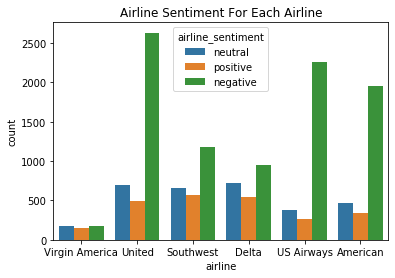

In [10]:
sns.countplot(x = "airline", hue = 'airline_sentiment', data = tweets)
plt.title("Airline Sentiment For Each Airline")

## Creating new dataframe with required series 

In [11]:
new_tweet = tweets[['airline_sentiment', 'text']]
pd.set_option('display.max_colwidth',0)
new_tweet.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials to the experience... tacky.
2,neutral,@VirginAmerica I didn't today... Must mean I need to take another trip!
3,negative,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse"
4,negative,@VirginAmerica and it's a really big bad thing about it


In [12]:
new_tweet.shape

(14640, 2)

In [13]:
new_tweet.isnull().sum()

airline_sentiment    0
text                 0
dtype: int64

In [14]:
new_tweet['text'][100]

'@VirginAmerica trying to add my boy Prince to my ressie. SF this Thursday @VirginAmerica from LAX http://t.co/GsB2J3c4gM'

In [15]:
import re
regex = r"@(VirginAmerica|united|SouthwestAir|Delta|USAirways|AmericanAir)"
def text_replace(text):
    return re.sub(regex, '@airline', text, flags=re.IGNORECASE)

new_tweet['text'] = new_tweet['text'].apply(text_replace)

C:\Users\Moaz\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [16]:
new_tweet.head()

,airline_sentiment,text
0,neutral,@airline What @dhepburn said.
1,positive,@airline plus you've added commercials to the experience... tacky.
2,neutral,@airline I didn't today... Must mean I need to take another trip!
3,negative,"@airline it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse"
4,negative,@airline and it's a really big bad thing about it


In [17]:
df_trn, df_val = train_test_split(new_tweet, stratify = new_tweet['airline_sentiment'], test_size = 0.3)
df_trn.shape, df_val.shape

((10248, 2), (4392, 2))

In [18]:
path = Path('C:\\Users\\Moaz\\Desktop\\moaz\\Jupyter Python NB')

In [19]:
# Language model data
data_lm = TextLMDataBunch.from_df(train_df = df_trn, valid_df = df_val, path = path)

In [20]:
# Classifier model data
data_clas = TextClasDataBunch.from_df(train_df = df_trn, valid_df = df_val, path = path, vocab=data_lm.train_ds.vocab, bs=32)

In [21]:
data_clas.show_batch()

text,target
xxbos @airline xxmaj hi have a question re future xxmaj flight xxmaj booking xxmaj problems . xxup dub - xxup jac 29 / 9 xxup jac - xxup lax 8 / 10 xxup lax - xxup dub 13 / 10 . i 'm * xxup g. xxmaj what is checked bag allowance for xxup jac - xxup lax ?,neutral
xxbos @airline xxmaj hi . i have xxup koa - xxup lax - xxup phl - xxup ord booked as a 1-way xxunk xxunk . xxmaj if i called to xxunk it to xxup koa - xxup lax - xxup phx - xxup ord would i have to pay any fees,neutral
"xxbos @airline i had to travel to xxmaj savannah , xxup ga , once again , on an airline i do n't "" xxmaj luv "" . xxmaj when r u going to fly me to xxmaj savannah ? xxmaj pl xxrep 4 e ase xxrep 4 !",neutral
xxbos @airline xxmaj aww xxmaj thanks xxup aa .. xxup dfw was on xxup gma up here this xxup am .. so i understand .. xxmaj btw xxup a.a is my xxmaj airline when i m able to trv .. xxmaj love you guys . : ),positive
"xxbos @airline xxmaj waiting for 3494 xxup ewr - xxup ord , delayed 47 mins . xxmaj might miss xxunk xxup ord - xxup ywg at 6 pm xxup ct . xxmaj any room on xxunk xxup ord - xxup ywg in case i miss xxunk ?",negative


xx___ tags represent the aspects of language<br>The xxbos tag marks the beginning of a sentence.<br> The xxmaj tag is used to imply that the first letter of the next word is capitalized.

## Create and Train the Language Model

In [22]:
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3)

# data_lm is the language model data bunch
# AWD-LSTM is the model architecture
# drop_multi is the drop-out.

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 6.92E-02
Min loss divided by 10: 5.25E-02


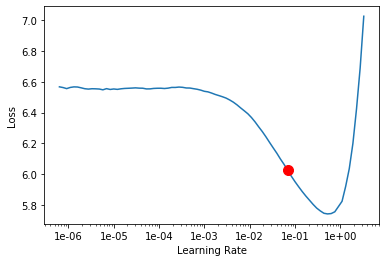

In [23]:
# let’s find the optimal learning rate to train our language model on

learn.lr_find()
learn.recorder.plot(suggestion=True)
min_grad_lr = learn.recorder.min_grad_lr

In [24]:
# let’s use this learning rate to train the language model

learn.fit_one_cycle(2, min_grad_lr)

epoch,train_loss,valid_loss,accuracy,time
0,4.595238,4.007564,0.276916,01:55
1,3.946849,3.846040,0.294010,02:02


In [25]:
# We can do a few more epochs after unfreezing all the layers. 
# This process will train the whole neural network rather than just the last few layers.
# unfreezing weights and training the rest of the NN

learn.unfreeze()
learn.fit_one_cycle(2, 1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,3.360409,3.757104,0.305608,01:56
1,3.221028,3.756794,0.307468,02:01


Our language model only achieved around 30% accuracy, but that is okay. This accuracy represents how well the model does at predicting the next word, given one word. And 33% means that 1 out of 3 times, the model accurately predicts the next word.

we can ask the model to predict what comes after “This flight sucks!”, till 10 words

In [26]:
learn.predict("This flight sucks!", n_words=10)

'This flight sucks! xxbos @airline 🙏 🙏 🙏 🙏 🙏 🙏 🙏 🙏'

Finally, let’s save the language model encoder so that we can load it later in our classifier

In [27]:
learn.save_encoder('ft_enc')

## Using the Language Model to Train the Classifier

Creating and training the the text classifier is very similar to training the language model.

In [28]:
learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5)
learn.load_encoder('ft_enc')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (10248 items)
x: TextList
xxbos @airline next day,xxbos @airline xxmaj yesterday , i 'm sorted now .,xxbos @airline booked a flight yesterday , appeared in my account + confirm email but since a few hours all disappeared and xxunk " no segment in this ",xxbos @airline xxunk x told no travel advisory - now xxup two hrs on hold & & disconnected . xxmaj fl from xxup bhm to xxmaj charlotte to xxup phl wo n't go - xxup help ! ! !,xxbos @airline i xxmaj love xxmaj american xxmaj airlines xxup :d
y: CategoryList
neutral,neutral,negative,negative,positive
Path: C:\Users\Moaz\Desktop\moaz\Jupyter Python NB;

Valid: LabelList (4392 items)
x: TextList
xxbos @airline was told at 7 pm my bags would 1000 % be at my house by 9 pm . xxmaj well they 're not and i continue to be lied to .,xxbos @airline my wife is trying to check in for a flight tonight out of xxup rsw ... website not allowing , saying must go to airport ... [ xxmaj part 1 of 2 ],xxbo

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.10E-06
Min loss divided by 10: 6.31E-02


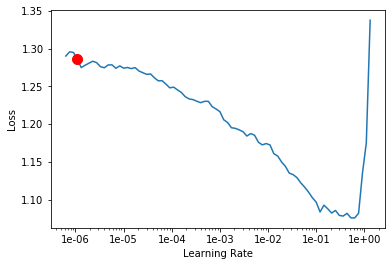

In [29]:
# Let’s again find the optimal learning rate

learn.lr_find()
learn.recorder.plot(suggestion=True)
min_grad_lr = learn.recorder.min_grad_lr

To train the classifier, we can start by training the last few layers, then go backwards and unfreeze and train layers before. We can use the learner function learn.freeze_to(-2) to unfreeze the last 2 layers. We will also use learn.recorder.plot_losses() to track our loss function over the epochs.

In [30]:
learn.fit_one_cycle(2, min_grad_lr)

epoch,train_loss,valid_loss,accuracy,time
0,1.217611,1.205628,0.282787,04:05
1,1.214197,1.213531,0.292122,03:49


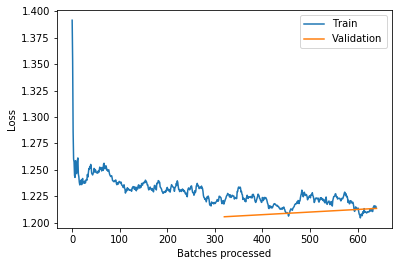

In [31]:
learn.recorder.plot_losses()

In [32]:
learn.freeze_to(-2)
learn.fit_one_cycle(4, slice(5e-3, 2e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.713622,0.598387,0.770719,04:08
1,0.603788,0.532681,0.785519,03:58
2,0.526527,0.500035,0.802368,03:54
3,0.510986,0.496627,0.806011,04:29


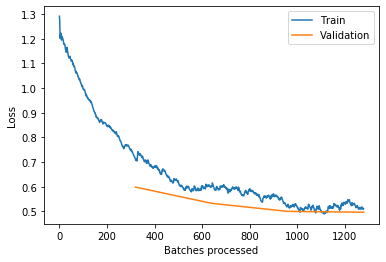

In [33]:
learn.recorder.plot_losses()

Finally, let us unfreeze all layers and train the model at a low learning rate.

In [34]:
learn.unfreeze()
learn.fit_one_cycle(4, slice(2e-3/100, 2e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.485626,0.503815,0.793033,04:37
1,0.463164,0.483875,0.806922,04:26
2,0.423591,0.480439,0.813752,04:05
3,0.377144,0.486406,0.813980,04:46


We have a model with 83% accuracy. With more epochs and better hyper-parameter tuning, it is possible to improve this score

## Confusion matrix

We can plot the confusion matrix for our predictions on the test set

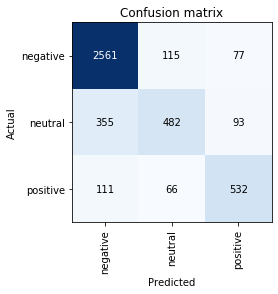

In [35]:
preds,y,losses = learn.get_preds(with_loss=True)
interp = ClassificationInterpretation(learn, preds, y, losses)
interp.plot_confusion_matrix()

## Prediction

We are finally ready to use our model to predict the category of any sentence

In [39]:
learn.predict("airline service was good")

C:\Users\Moaz\anaconda3\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


(Category positive, tensor(2), tensor([0.2106, 0.0263, 0.7631]))